# Fun with Astrometry

**LSST-DA Data Science Fellowship Program**

*by Alex Drlica-Wagner (2025-09-15)*

In this notebook we explore a few features related to astrometry and proper motion.

*Acknowledgements: This notebook draws inspiration from previous DSFP notebooks from Gary Bernstein and Colin Slater.*

In [1]:
# Standard imports
import numpy as np
import scipy.stats
import pylab as plt
import pandas as pd

## Exercise 1: The Simple 1D Case

In the lecture notes we asserted several statistical properties that we will now verify. First, let's verify that in the trivial, unbinned case, the uncertainty on the mean decreases as $1/\sqrt{N}$.

In [26]:
# Draw the 1D locations "photons" from a "PSF"

# Create a Gaussian pdf
mu,sigma = 0, 1
pdf = scipy.stats.norm(mu,sigma)

# Measure the mean calculated from 1000 trials at each number of photons
ntrials = 1000
nphotons = [1, 10, 100, 1000, 10000]
unbinned_means = []
for nph in nphotons: 
    x = pdf.rvs((nph, ntrials)) #draw nphotons samples from the PDF (for ntrials)
    means = np.mean(x, axis=0) #compute the mean of each sample
    unbinned_means.append( [nph, means] ) #save the means, associated with the number of samples

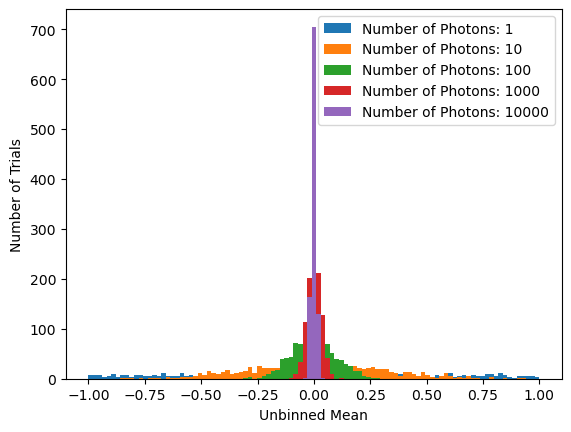

In [27]:
# Plot how the distribution of means changes with photon number
plt.figure()
for nph, mean in unbinned_means:
    plt.hist(mean, bins=np.linspace(-1, 1, 100), label=f"Number of Photons: {nph}")
plt.xlabel("Unbinned Mean")
plt.ylabel("Number of Trials")
plt.legend()
plt.show()

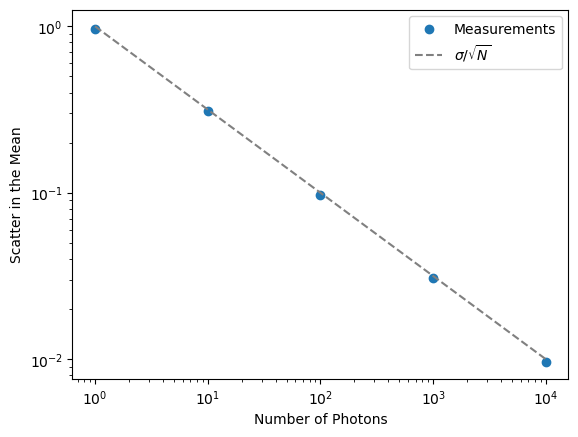

In [28]:
std = np.array([np.std(means) for nph, means in unbinned_means])
plt.scatter(nphotons, std, label="Measurements")
plt.plot(nphotons, sigma/np.sqrt(nphotons), '--', color='gray', label=r"$\sigma/\sqrt{N}$")
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.legend()
plt.ylabel("Scatter in the Mean")
plt.xlabel("Number of Photons")
plt.show()

<span><span style="color:blue;font-weight: bold;">Exercise:</span> The above example demonstrates that our statistical assumptions worked for continuous, unpixelized results. Use `np.histogram` to bin the photons into "pixels". Verify that our statistical assumption holds for 1D pixelated data when the mean is calculated as $\bar{x} = \sum_{x} x I_x$.

In [29]:
# Draw the 1D locations "photons" from a "PSF"
mu,sigma = 0, 1
pdf = scipy.stats.norm(mu,sigma)

# Configure the bins
bins = np.linspace(-10,10,101)
centers = (bins[1:] + bins[:-1])/2.

# Create sources with different numbers of photons
nphotons = [1, 10, 100, 1000, 10000]
# Number of realizations of each source
ntrials = 1000

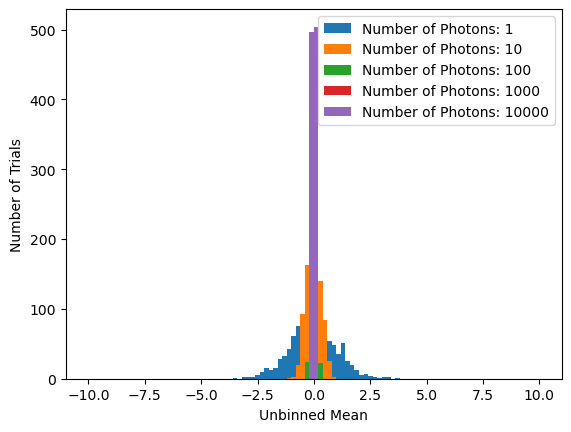

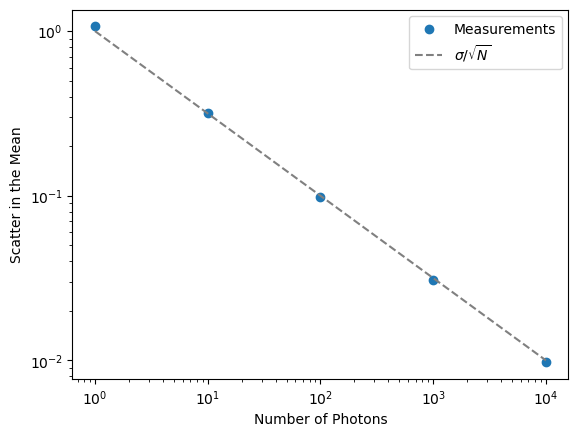

In [41]:
# Your code here...

#Calculating the binned means
binned_means = []
for nph in nphotons:
    x = pdf.rvs((nph, ntrials))
    means = []
    for trial in range(ntrials):
        binned_x, _ = np.histogram(x[:,trial], bins=bins)
        means.append(np.sum(centers*binned_x)/np.sum(binned_x))
    binned_means.append([nph, means])

#Distribution of means
plt.figure()
for nph, mean in binned_means:
    plt.hist(mean, bins=bins, label=f"Number of Photons: {nph}")
plt.xlabel("Unbinned Mean")
plt.ylabel("Number of Trials")
plt.legend()
plt.show()

#Relationship between number of photons and the noise (stdev)
std = np.array([np.std(means) for nph, means in binned_means])
plt.scatter(nphotons, std, label="Measurements")
plt.plot(nphotons, sigma/np.sqrt(nphotons), '--', color='gray', label=r"$\sigma/\sqrt{N}$")
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.legend()
plt.ylabel("Scatter in the Mean")
plt.xlabel("Number of Photons")
plt.show()

## Exercise 2: The 2D Case

Now, let's try the 2D example. First we'll start by defining our 2D point source as a multivariate normal distribution centered at $x,y = (2,0)$ with $\sigma_x = \sigma_y = 1$ (we choose to offset the source so that we can double check that our indexing is correct).

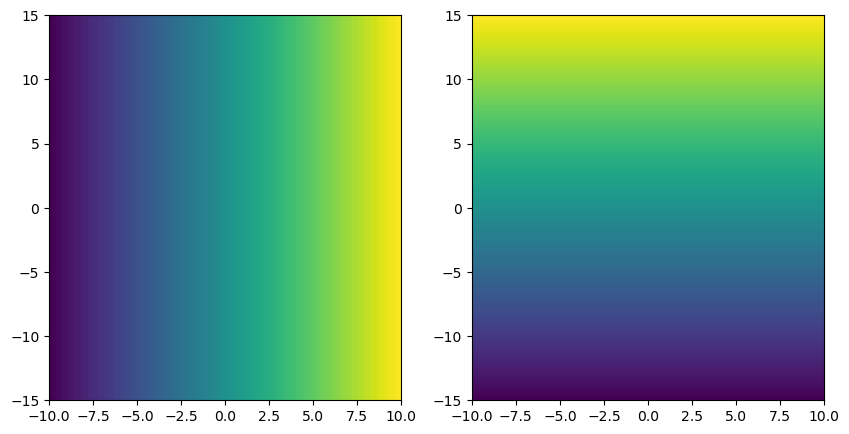

In [42]:
# Create the 2d normal distribution
xtrue,ytrue = 2, 0
sigma = 1
mu = np.array([xtrue,ytrue])
cov = np.array([ [sigma,0],[0,sigma] ])
pdf = scipy.stats.multivariate_normal(mean=mu,cov=cov)

# Create the pixel edges and centers
bins = xbins, ybins = [np.linspace(-10,10,101), np.linspace(-15,15,151)]
centers = xcenters, ycenters = [(bins[0][1:] + bins[0][:-1])/2., (bins[1][1:] + bins[1][:-1])/2.]

# x,y coordinates for the center of each pixel
# Note the convention of numpy is array[row, column]...
# The indexing='ij' is a "cheat" that I "discovered". Does it work? I don't know...
xx,yy = np.meshgrid(xcenters, ycenters, indexing='ij')

# Sanity check for x,y coordinates...
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].pcolormesh(xx,yy,xx)
ax[1].pcolormesh(xx,yy,yy)

<span><span style="color:blue;font-weight: bold;">Exercise:</span> Generate 1000 photons from the 2D point source. Plot the distribution as a scatter plot. Use `np.histogram2d` to bin the photons into pixels. Call the counts in each pixel `Ixy`.  Use `np.pcolormesh` to plot `Ixy` to show what the image produced from a pixelated detector would look like. (Make sure your x,y axis orientation is correct.)

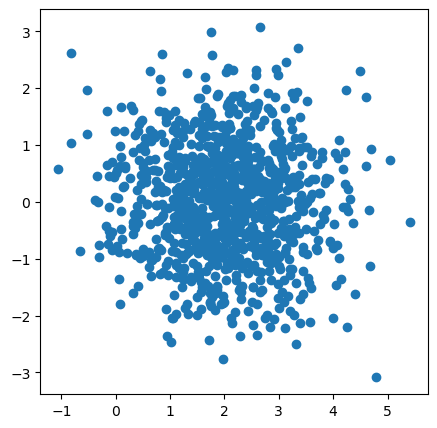

In [50]:
# Code for your answer here...

p = pdf.rvs(1000)

plt.figure(figsize=(5,5))
plt.scatter(p[:,0], p[:,1])
plt.show()

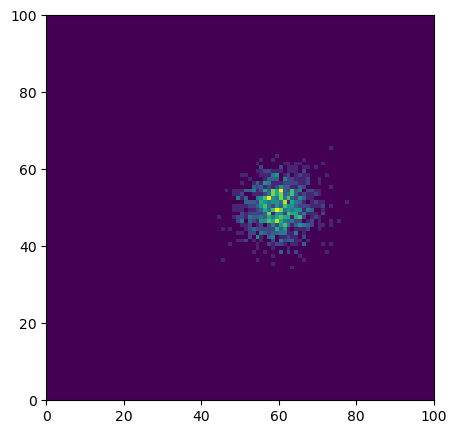

In [70]:
Ixy, _, _ = np.histogram2d(p[:,0], p[:,1], bins=np.linspace(-10,10,101))

plt.figure(figsize=(5,5))
plt.pcolormesh(np.rot90(Ixy))
plt.show()

<span><span style="color:blue;font-weight: bold;">Exercise:</span> Calculate the 2D centroid of your pixelated distribution, $(\bar{x}, \bar{y})$, using the counts in each pixel, $I(x,y)$ from the formulae

$$\bar{x} = \frac{\sum_{xy} x I_{xy}}{\sum_{xy} I_{xy}},~~ \bar{y} = \frac{\sum_{xy} y I_{xy}}{\sum_{xy} I_{xy}}$$

Plot the centroid on top of your pixelated image. How does it look?

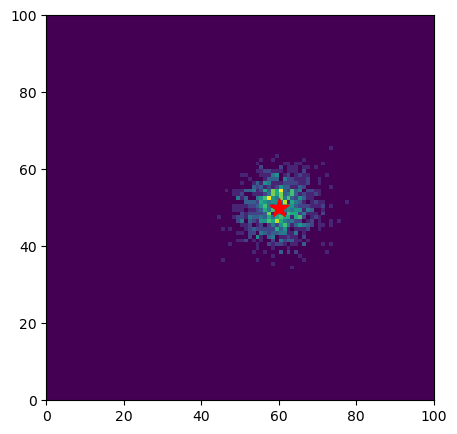

In [80]:
# Your answer below.

bins_1d = np.linspace(-10,10,101)
centers_1d = (bins_1d[1:] + bins_1d[:-1])/2.
yy, xx = np.meshgrid(centers_1d, centers_1d)

x_centroid = np.sum(xx*Ixy)/np.sum(Ixy)
y_centroid = np.sum(yy*Ixy)/np.sum(Ixy)

xc_bin = np.argmax(np.histogram(x_centroid, bins=bins_1d)[0])
yc_bin = np.argmax(np.histogram(y_centroid, bins=bins_1d)[0])

plt.figure(figsize=(5,5))
plt.pcolormesh(np.rot90(Ixy))
plt.scatter(xc_bin, yc_bin, color='red', marker='*', s=200)
plt.show()

### Adding noise

Now we are going to add some random noise to the counts in each pixel. This is akin to the noise that would be left after subtracting the sky background. For the purposes of this exercise, assume that the noise is Gaussian: $\mathcal{N}(\mu, \sigma)$

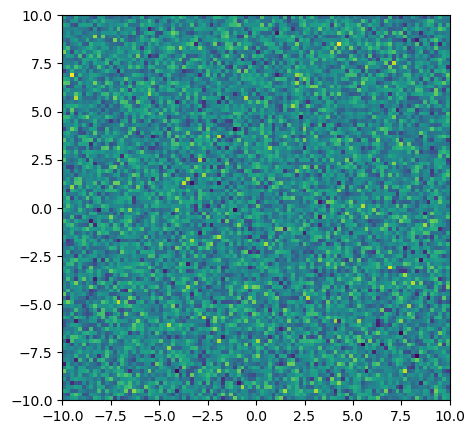

In [82]:
# Generate random Gaussian noise left over after sky subtraction.
sky_mu, sky_sigma = 0, 3
sky_noise = scipy.stats.norm(sky_mu, sky_sigma).rvs(size=Ixy.shape)

fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.pcolormesh(xx, yy, sky_noise)

<span><span style="color:blue;font-weight: bold;">Question:</span> Add the sky noise to your pixelated counts. Plot the image of your source + noise and calculate the centroid $(\bar{x}, \bar{y})$ following the same procedure above. Do this several times for several realizations of the noise. What happens and why?

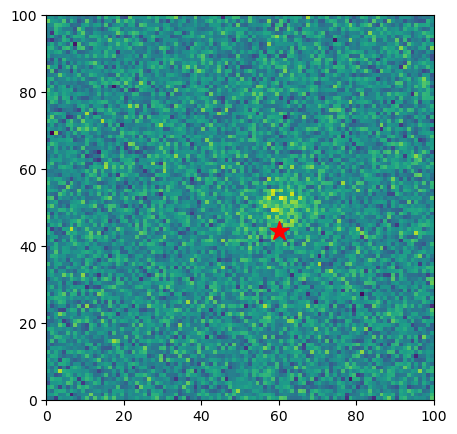

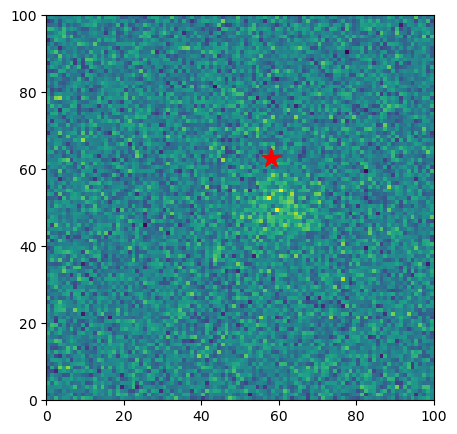

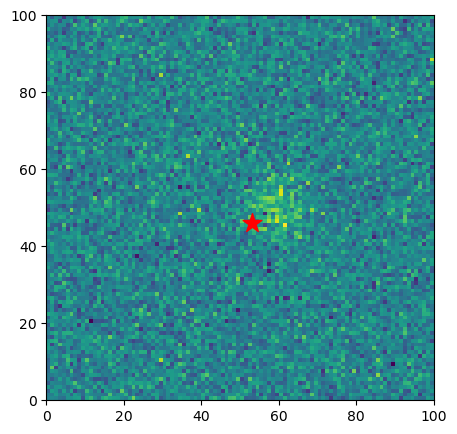

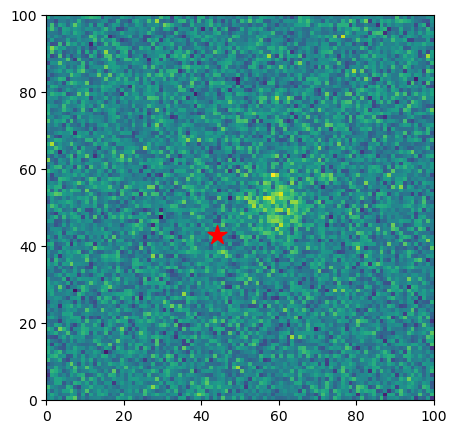

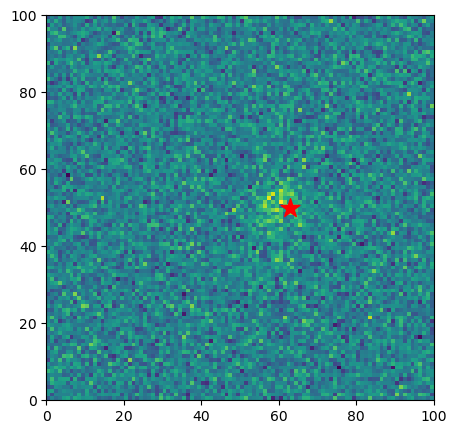

In [83]:
# Your code here...

def get_centroid(Ixy):
    bins_1d = np.linspace(-10,10,101)
    centers_1d = (bins_1d[1:] + bins_1d[:-1])/2.
    yy, xx = np.meshgrid(centers_1d, centers_1d)
    #Get centroid coordinates
    x_centroid = np.sum(xx*Ixy)/np.sum(Ixy)
    y_centroid = np.sum(yy*Ixy)/np.sum(Ixy)
    #Get the bin that the coordinates correspond to
    xc_bin = np.argmax(np.histogram(x_centroid, bins=bins_1d)[0])
    yc_bin = np.argmax(np.histogram(y_centroid, bins=bins_1d)[0])
    return xc_bin, yc_bin

for n in range(5):
    sky_noise = scipy.stats.norm(sky_mu, sky_sigma).rvs(size=Ixy.shape)
    noisy_image = Ixy + sky_noise
    xc, yc = get_centroid(noisy_image)
    plt.figure(figsize=(5,5))
    plt.pcolormesh(np.rot90(noisy_image))
    plt.scatter(xc, yc, color='red', marker='*', s=200)
    plt.show()

### Windowed Centroiding

As discussed in the lecture, the common way to address centroiding in the background-dominated regime is to apply an aperture (or window) filter function. We will define two simple top-hat filters below. Applying them amounts to basically restricting our fit to only use the pixels around the source.

In [ ]:
# Setup the top-hat window array

def square_window(x0, y0, half_width):
    window = np.zeros_like(Ixy)
    window  = (np.abs(xx - x0) < half_width)
    window &= (np.abs(yy - y0) < half_width)
    return window
    
def circular_window(x0, y0, radius):
    window = np.zeros_like(Ixy)
    window  = np.sqrt( (xx - x0)**2 + (yy - y0)**2) < radius
    return window

In order to apply the filter, we need to make an initial guess at where the window should be centered. We've just seen that our centroid estimate can be way off, so we need another estimate. We could use the true center of the object, but that is cheating. Let's try centering the window on the peak, i.e., the pixel with the maximum number of counts. (This has worked in most realizations of the noise that I have seen.)

<span><span style="color:blue;font-weight: bold;">Exercise:</span> Find the x,y coordinates of the pixel with the maximum value. Plot each of the two window functions centered on that pixel with a half-width/radius of `3*sigma`, where `sigma` is the effective "PSF" width that we to simulate our source (our results won't be too sensitive to our choice, and we can assume that we have measured this "PSF" from bright stars...).

In [ ]:
# Your code here...




<span><span style="color:blue;font-weight: bold;">Exercise:</span> Apply the window and re-calculate the centroid. 

$$\bar{x} = \frac{\sum_{xy} x I_{xy}}{\sum_{xy} I_{xy}},~~ \bar{y} = \frac{\sum_{xy} y I_{xy}}{\sum_{xy} I_{xy}}$$

Did it help? Could you imagine an iterative approach that would converge on a more correct centroid?

In [ ]:
# Your code here...





## Excercise 2: Fast Moving Star

*(Adapted from Gary Bernstein)*

This exercise uses two CCD images and the associated catalogs from the Dark Energy Survey (DES):
* First Image: [D00387788_r_c24_r3567p02_immasked.fits.fz](https://data.darkenergysurvey.org/fnalmisc/D00387788_r_c24_r3567p02_immasked.fits.fz)
* First Catalog: [D00387788_r_c24_r3567p02_red-fullcat.fits](https://data.darkenergysurvey.org/fnalmisc/D00387788_r_c24_r3567p02_red-fullcat.fits)
* Second Image: [D00704796_r_c35_r3518p01_immasked.fits.fz](https://data.darkenergysurvey.org/fnalmisc/D00704796_r_c35_r3518p01_immasked.fits.fz)
* Second Catalog: [D00704796_r_c35_r3518p01_red-fullcat.fits](https://data.darkenergysurvey.org/fnalmisc/D00704796_r_c35_r3518p01_red-fullcat.fits)

According to Gaia, there is a fast-moving star located at roughly (29.91148,-8.212267). If you display these two images using DS9, then align them using the Frame->Match->Frame->WCS option, you will be able to move your cursor to those coordinates actually see the star move.

We are going to practice starting from the windowed centroids of the catalog detections of this star, using the WCS to transform them to sky coordinates, and calculating the proper motion of the star.

In [ ]:
# Common astropy imports
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from astropy.coordinates import SkyCoord

In [ ]:
# Read the FITS files

img1 = fits.open('D00387788_r_c24_r3567p02_immasked.fits.fz')
cat1 = fits.open('D00387788_r_c24_r3567p02_red-fullcat.fits')

img2 = fits.open('D00704796_r_c35_r3518p01_immasked.fits.fz')
cat2 = fits.open('D00704796_r_c35_r3518p01_red-fullcat.fits')

<span><span style="color:blue;font-weight: bold;">Exercise:</span> Get the Modified Julien Date (`MJD-OBS`) and World Coordinate System (using the `WCS)` class) from the headers of the two images. How far separated in time are the two images? How far separated in angle on the sky are the centers of the two CCDs?

In [ ]:
# Your code here...




<span><span style="color:blue;font-weight: bold;">Exercise:</span> Use the associated WCS to convert the windowed centroids of the catalogs into sky coordinates (RA, Dec). Find the catalog object associated with our target star at RA, DEC ~ (29.91148,-8.212267). What the the windowed centroid coordinates (`XWIN_IMAGE`, `YWIN_IMAGE`) for the detection? What is the major axis of the windowed image centroid error ellipse (`

In [ ]:
# Your code here...




<span><span style="color:blue;font-weight: bold;">Exercise:</span> Using the two sky coordinates calculated above to estimate the proper motion (in mas/yr) of the star between the two exposures. Note that proper motions are traditionally given in real angular motions, so that (RA PM) = (difference in RA) * cos(dec) / (time interval). Estimate the uncertainty on these measurements using the `ERRAWIN_IMAGE` estimates and a 10 mas turbulence uncertainty (added in quadrature).

The measurement from Gaia DR2 was:
```
pmra  =  326.06  +/- 0.94 mas/yr
pmdec = -124.12 +/- 0.81 mas/yr
```

Can you speculate about some inaccuracies in your estimate?

In [ ]:
# Your code here...


